In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
data = pd.read_csv("./Dataset.csv")

In [4]:
data.head()

,Age,Competition,Type,Profit
0,Old,Yes,s/w,Down
1,Old,No,s/w,Down
2,Old,No,h/w,Down
3,Mid,Yes,s/w,Down
4,Mid,Yes,h/w,Down


In [5]:
data['Age'].unique()

array(['Old', 'Mid', 'New'], dtype=object)

In [6]:
data['Competition'].unique()

array(['Yes', 'No'], dtype=object)

In [7]:
data['Type'].unique()

array(['s/w', 'h/w'], dtype=object)

In [8]:
data['Profit'].unique()

array(['Down', 'Up'], dtype=object)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
Age            13 non-null object
Competition    13 non-null object
Type           13 non-null object
Profit         13 non-null object
dtypes: object(4)
memory usage: 272.0+ bytes


In [10]:
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [11]:
mytree = tree.DecisionTreeClassifier()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
lb = LabelEncoder()

In [14]:
data['Age'] = lb.fit_transform(data['Age'])
data['Age'].head()

0    2
1    2
2    2
3    0
4    0
Name: Age, dtype: int32

In [15]:
data['Competition'] = lb.fit_transform(data['Competition'])
data['Competition'].head()

0    1
1    0
2    0
3    1
4    1
Name: Competition, dtype: int32

In [16]:
data['Type'] = lb.fit_transform(data['Type'])
data['Type'].head()

0    1
1    1
2    0
3    1
4    0
Name: Type, dtype: int32

In [17]:
data['Profit'] = lb.fit_transform(data['Profit'])
data['Profit'].head()

0    0
1    0
2    0
3    0
4    0
Name: Profit, dtype: int32

In [18]:
data.head()

,Age,Competition,Type,Profit
0,2,1,1,0
1,2,0,1,0
2,2,0,0,0
3,0,1,1,0
4,0,1,0,0


In [19]:
data['Profit'].unique()

array([0, 1], dtype=int64)

In [20]:
X = data.drop("Profit", axis =1)

In [21]:
X.head(12)

,Age,Competition,Type
0,2,1,1
1,2,0,1
2,2,0,0
3,0,1,1
4,0,1,0
5,0,0,0
6,0,0,1
7,1,1,1
8,1,0,0
9,1,0,0


In [22]:
y = data["Profit"]

In [23]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Profit, dtype: int32

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

In [25]:
x_train.shape

(9, 3)

In [26]:
y_train.shape

(9,)

In [27]:
y_train

7     1
12    0
11    0
0     0
3     0
8     1
9     1
4     0
6     1
Name: Profit, dtype: int32

In [28]:
mytree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
yPred = mytree.predict(x_test)

In [30]:
mytree.predict(np.array([[2,1,1]]))

array([0])

In [31]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [32]:
print(classification_report(y_test,yPred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [33]:
confusion_matrix(y_test,yPred)

array([[1, 1],
       [0, 2]], dtype=int64)

In [34]:
accuracy_score(y_test,yPred)

0.75

In [35]:
cols = X.columns

In [36]:
cols

Index(['Age', 'Competition', 'Type'], dtype='object')

In [46]:
ml_tree = tree.DecisionTreeClassifier(max_depth=6,criterion='entropy')
ml_tree_1 = tree.DecisionTreeClassifier(max_depth=6)

In [47]:
ml_tree.fit(X=X,y=y)
ml_tree_1.fit(X=X,y=y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
with open('Dtree_1.dot','w') as f:
    f = tree.export_graphviz(ml_tree,feature_names=['Age', 'Competition', 'Profit',],out_file=f)

    
with open('Dtree_3.dot','w') as p:
    p = tree.export_graphviz(ml_tree_1,feature_names=['Age', 'Competition', 'Profit',],out_file=p)


In [49]:
import seaborn as sns

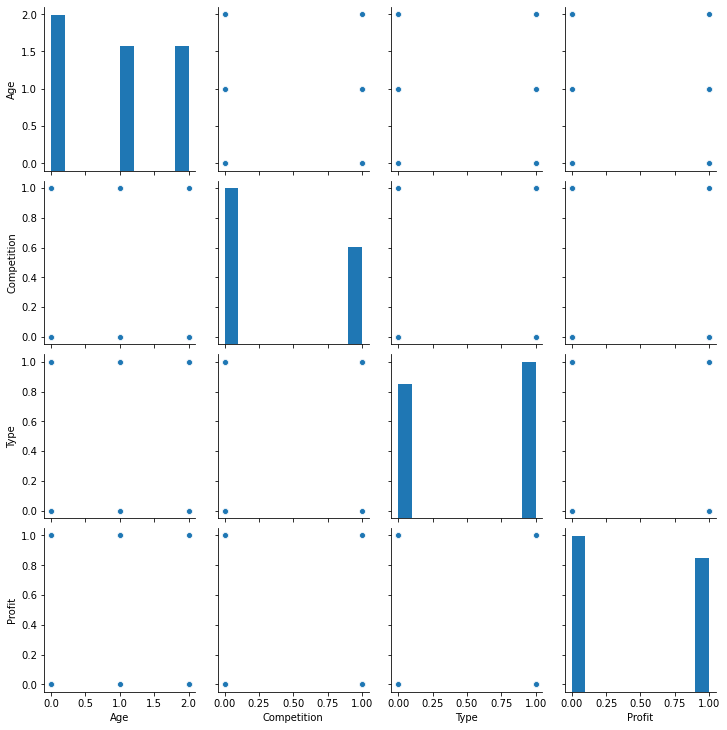

In [41]:
sns.pairplot(data)

In [50]:
from matplotlib.pylab import rcParams

In [51]:
rcParams['figure.figsize'] = 20,10

In [52]:
from sklearn.tree import plot_tree

[Text(604.5, 475.65000000000003, 'X[1] <= 0.5\nentropy = 0.996\nsamples = 13\nvalue = [7, 6]'),
 Text(372.0, 339.75, 'X[0] <= 1.5\nentropy = 0.954\nsamples = 8\nvalue = [3, 5]'),
 Text(186.0, 203.85000000000002, 'X[2] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(93.0, 67.94999999999999, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(279.0, 67.94999999999999, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(558.0, 203.85000000000002, 'X[2] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(465.0, 67.94999999999999, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(651.0, 67.94999999999999, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(837.0, 339.75, 'X[0] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(744.0, 203.85000000000002, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(930.0, 203.85000000000002, 'X[0] <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(837.0, 67.94999999999999, 'entropy = 1.0\nsamples = 

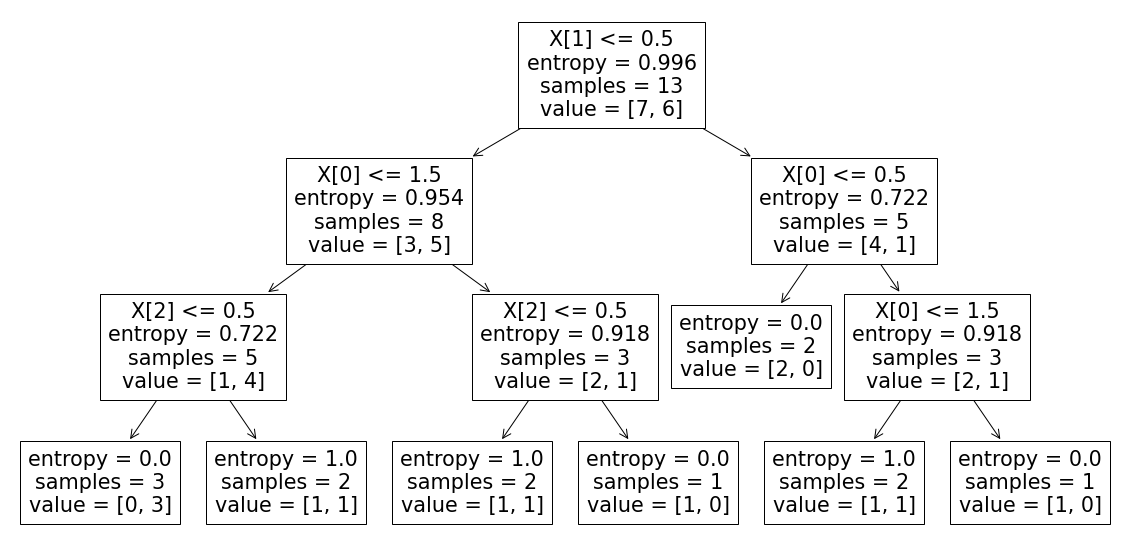

In [45]:
plot_tree(ml_tree)

[Text(604.5, 475.65000000000003, 'X[1] <= 0.5\ngini = 0.497\nsamples = 13\nvalue = [7, 6]'),
 Text(372.0, 339.75, 'X[0] <= 1.5\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(186.0, 203.85000000000002, 'X[2] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(93.0, 67.94999999999999, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(279.0, 67.94999999999999, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(558.0, 203.85000000000002, 'X[2] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(465.0, 67.94999999999999, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(651.0, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(837.0, 339.75, 'X[0] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(744.0, 203.85000000000002, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(930.0, 203.85000000000002, 'X[0] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(837.0, 67.94999999999999, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(1023.0, 67.

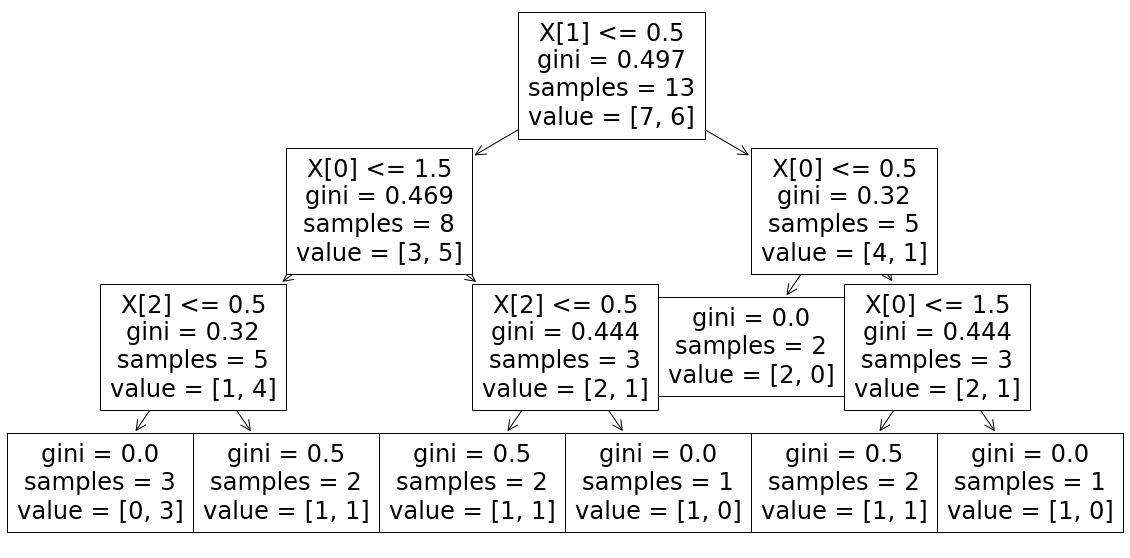

In [53]:
plot_tree(ml_tree_1)